# Principal Component Analysis

PCA is a dimensionality reduction technique that is used to reduce the number of features in a dataset. It is a linear transformation that projects the data into a lower dimensional space. The number of dimensions is determined by the number of principal components. The principal components are the directions of maximum variance in the data. The first principal component is the direction of maximum variance, the second principal component is the direction of maximum variance that is orthogonal to the first principal component, and so on.



In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

sns.set(font_scale=1.5)

data = pd.read_csv('data/cleaned/voice_data.csv')
X_train = pd.read_csv('data/cleaned/X_train.csv')
y_train = pd.read_csv('data/cleaned/y_train.csv')
X_test = pd.read_csv('data/cleaned/X_test.csv')
y_test = pd.read_csv('data/cleaned/y_test.csv')

We evaluate the impact of dimensionality reduction using PCA on the accuracy of SVM. It iterates over a range of n_components (from 2 to the number of columns in the X_train dataset) and trains an SVM model on each PCA-transformed dataset. Then, it records the accuracy of each model on the test set and plots the accuracy scores for different numbers of principal components to help determine the optimal number of dimensions to use for the PCA transformation.

C:\Users\pufan\AppData\Local\Temp\ipykernel_12992\1469778427.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  arr = pd.Series()
C:\Users\pufan\AppData\Local\Temp\ipykernel_12992\1469778427.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arr = arr.append(pd.Series(svm.score(X_test_pca, y_test.squeeze()), index=[n_components]))
C:\Users\pufan\AppData\Local\Temp\ipykernel_12992\1469778427.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arr = arr.append(pd.Series(svm.score(X_test_pca, y_test.squeeze()), index=[n_components]))
C:\Users\pufan\AppData\Local\Temp\ipykernel_12992\1469778427.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a fut

<Axes: >

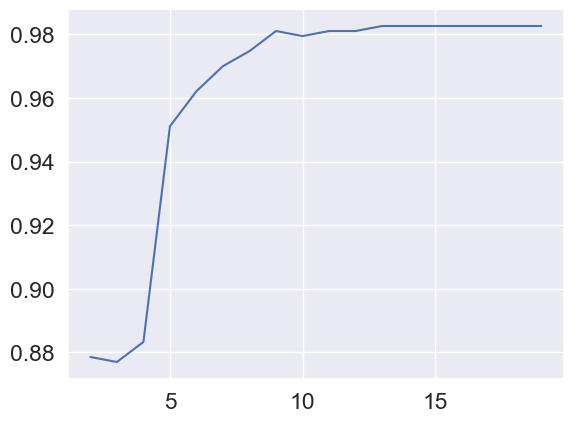

In [3]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA

arr = pd.Series()

for n_components in range(2, X_train.columns.size + 1):
    pca = PCA(n_components=n_components, random_state=87)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    svm = SVC(random_state=87).fit(X_train_pca, y_train.squeeze())
    arr = arr.append(pd.Series(svm.score(X_test_pca, y_test.squeeze()), index=[n_components]))

# make the label of x-axis to be the number of dimension remains
arr.plot()

As the number of principal components increases, the efficiency of the model decreases, and the accuracy does not increase significantly. This means that the number of principal components can be reduced without significantly affecting the accuracy of the model. Therefore, it may be possible to achieve similar performance with a simpler model that uses fewer principal components, which can lead to better efficiency and easier interpretability. It is important to carefully consider the trade-off between accuracy and efficiency when selecting the number of principal components to use in the model.